In [2]:
import pandas as pd
import numpy as np

In [3]:
df_nycbiz = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')


In [4]:
# How many different companies are represented in the data set?
print(f'There are {df_nycbiz["Company Name"].str.lower().unique().shape[0]}'\
     ' different companies in the data set')

There are 439 different companies in the data set


In [5]:
# What is the total number of jobs created for businesses in Queens?
df_nycbiz['City'] = df_nycbiz['City'].str.lower().replace('[^a-zA-Z]','',regex=True)
df_nycbiz.groupby('City').get_group('queens')['Job created'].sum()

90.0

In [6]:
# How many different unique email domains names are there in the data set?
df_nycbiz['company email'].str.lower().str.extract(r'((?<=@).+)',expand=False).unique().shape[0]


357

In [7]:
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 
# nta = []
# savings = []
# jobs = []
# for g,i in df_nycbiz.groupby('NTA'):
#     if i['Company Name'].agg('count')>4:
#         nta.append(str(g))
#         savings.append(i["Total Savings"].mean())
#         jobs.append(i["Job created"].sum())
# df_nta = pd.DataFrame(np.column_stack([nta,savings,jobs]),columns=['NTA','savings','jobs created'])

# OR
df_nta = df_nycbiz.groupby('NTA').agg({
    'Company Name': 'count',
    'Total Savings': 'mean',
    'Job created': 'sum'}).query('`Company Name`>4').drop('Company Name',1).reset_index()


/tmp/ipykernel_8807/380067906.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_nta = df_nycbiz.groupby('NTA').agg({


<AxesSubplot:xlabel='Job created', ylabel='Total Savings'>

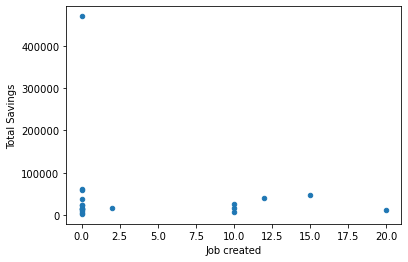

In [10]:
# scatter plot of jobs created versus average savings. 
# Use both a standard and a logarithmic scale for the average savings. 
df_nta.plot(x='Job created',y='Total Savings',kind='scatter')

Text(0.5, 0, 'total jobs created')

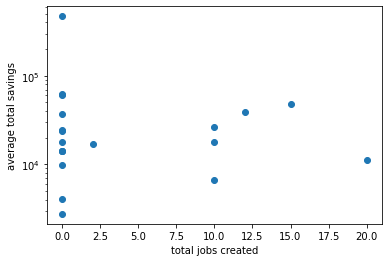

In [11]:
# scatter plot of jobs created versus average savings. 
# Use both a standard and a logarithmic scale for the average savings. 
import matplotlib.pyplot as plt
plt.semilogy('Job created','Total Savings','o',data=df_nta)
plt.ylabel('average total savings')
plt.xlabel('total jobs created')

Text(0, 0.5, 'frequency')

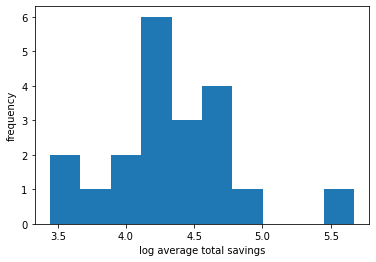

In [12]:
#histogram of the log of the average total savings.
plt.hist(np.log10(df_nta['Total Savings']))
plt.xlabel('log average total savings')
plt.ylabel('frequency')

<AxesSubplot:xlabel='Effective Date', ylabel='jobs created'>

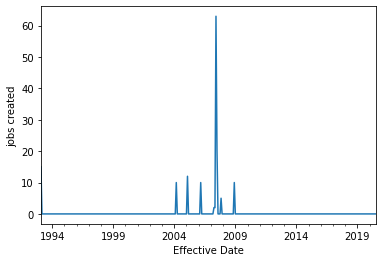

In [14]:
# line plot of the total jobs created for each month.
df_nycbiz['Effective Date'] = pd.to_datetime(df_nycbiz['Effective Date'],format="%m/%d/%Y")
df_nycbiz.groupby(pd.Grouper(
    key='Effective Date',axis=0,freq='M'))['Job created'].sum().plot(
        ylabel='jobs created')